(16404, 21)
(16404,)
Index(['CustomerID', 'FirstName', 'LastName', 'AddressLine1', 'City',
       'StateProvinceName', 'CountryRegionName', 'PostalCode', 'PhoneNumber',
       'BirthDate', 'Education', 'Occupation', 'Gender', 'MaritalStatus',
       'HomeOwnerFlag', 'NumberCarsOwned', 'NumberChildrenAtHome',
       'TotalChildren', 'YearlyIncome', 'AveMonthSpend', 'BikeBuyer'],
      dtype='object')

For column CountryRegionName
United States     6935
Australia         3194
United Kingdom    1709
France            1591
Germany           1577
Canada            1398
Name: CountryRegionName, dtype: int64

For column Education
Bachelors              4758
Partial College        4451
High School            2944
Graduate Degree        2851
Partial High School    1400
Name: Education, dtype: int64

For column Occupation
Professional      4922
Skilled Manual    4038
Management        2718
Clerical          2597
Manual            2129
Name: Occupation, dtype: int64

For column Gender
M    8290
F

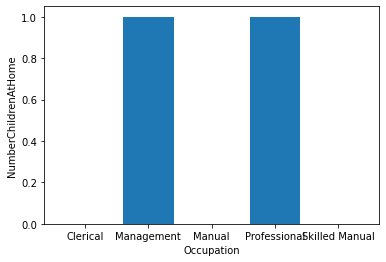

   NumberCarsOwned  NumberChildrenAtHome
0                0                     0
1                1                     0
2                2                     0
3                3                     3
4                4                     4


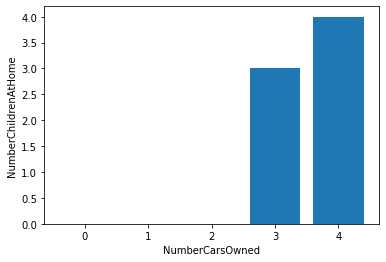

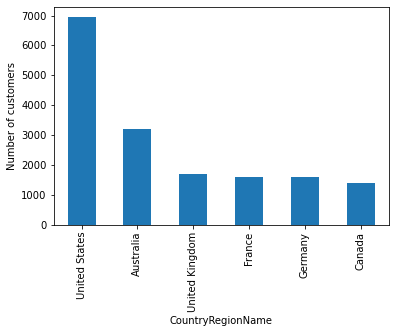

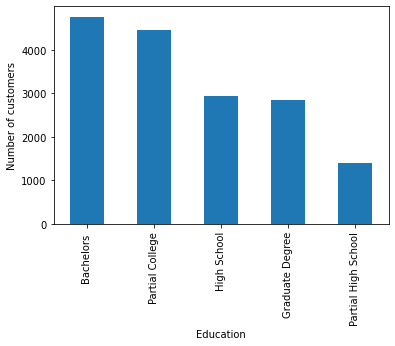

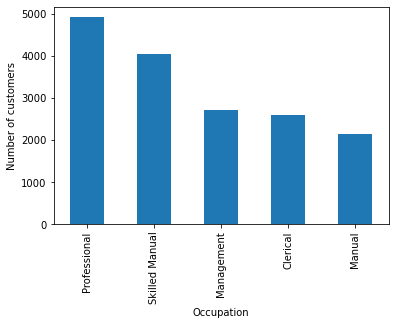

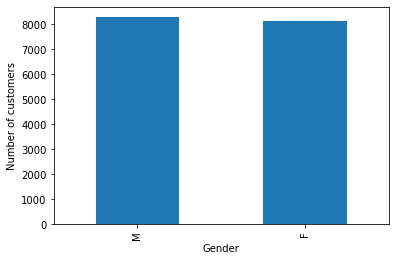

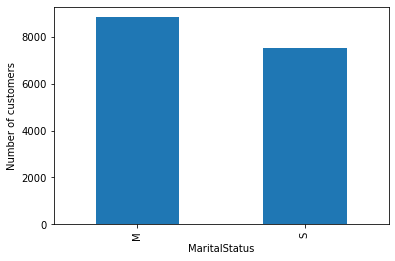

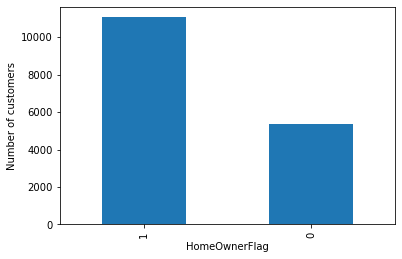

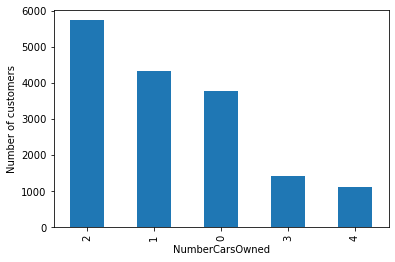

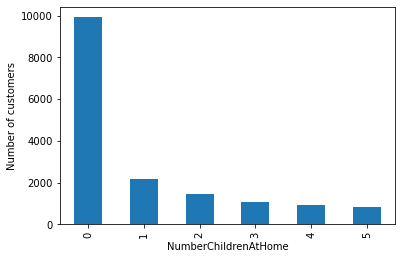

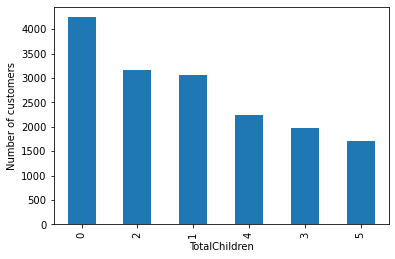

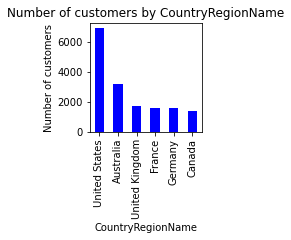

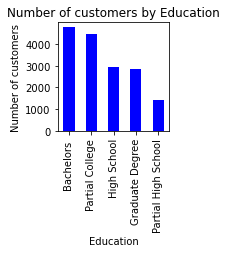

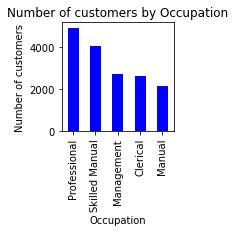

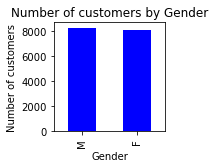

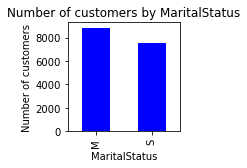

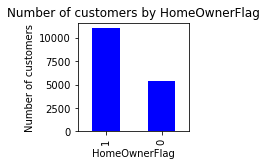

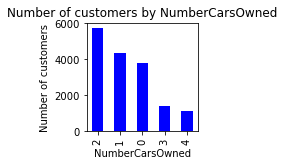

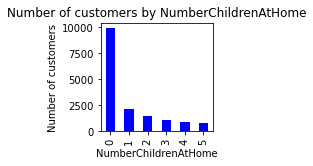

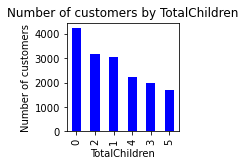

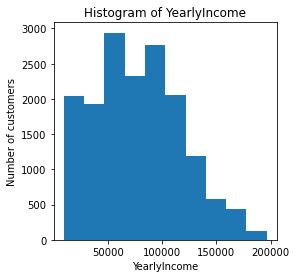

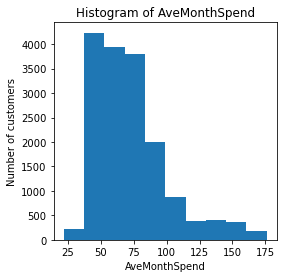

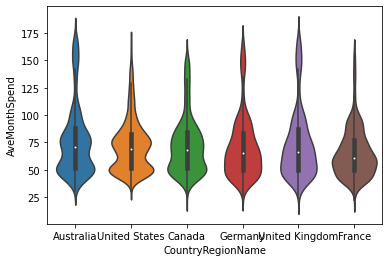

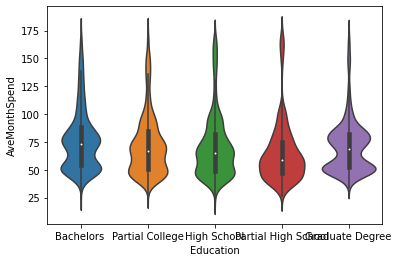

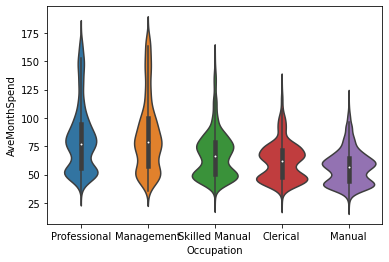

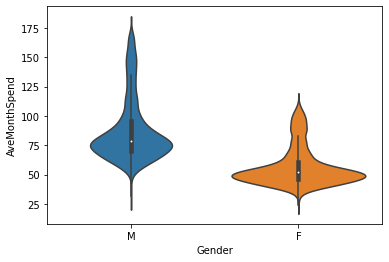

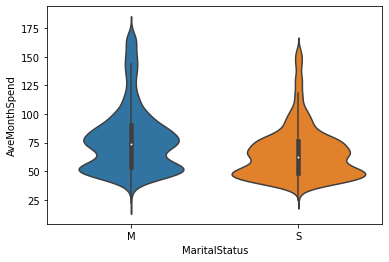

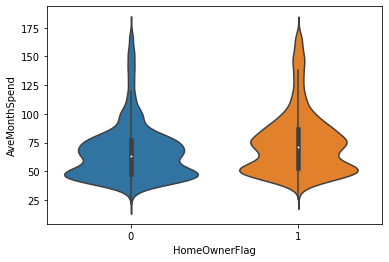

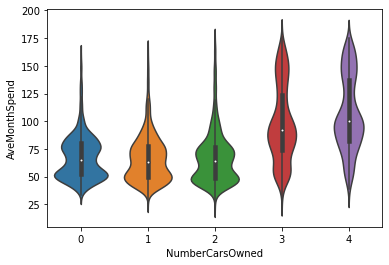

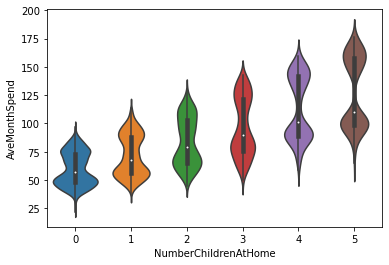

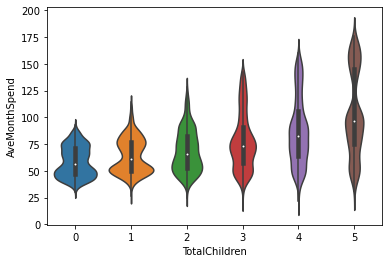

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


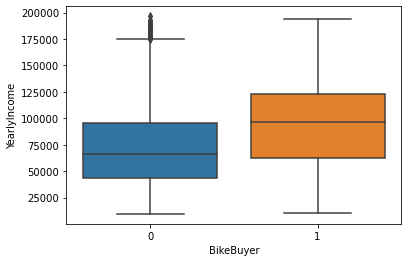

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


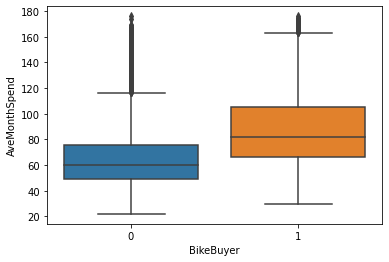

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import numpy.random as nr
import math
from datetime import datetime, date

%matplotlib inline

AW_data = pd.read_csv('AdvWorksCusts.csv')
AW_avemonth = pd.read_csv('AW_AveMonthSpend.csv')
AW_bikebuyer = pd.read_csv('AW_BikeBuyer.csv')
AW_data['AveMonthSpend'] = AW_avemonth['AveMonthSpend']
AW_data['BikeBuyer'] = AW_bikebuyer['BikeBuyer']
AW_test = pd.read_csv('AW_test.csv')
AW_data.head(10)

AW_data.dtypes

AW_data.columns
AW_data.shape
AW_data.isnull().sum()


AW_data.drop(['Title','MiddleName', 'Suffix', 'AddressLine2'], axis = 1, inplace = True)
AW_data.head(10)

AW_data.drop_duplicates(subset = 'CustomerID', keep = 'last', inplace = True)
print(AW_data.shape)
print(AW_data.CustomerID.unique().shape)

print(AW_data.columns)


AW_data.describe()

def count_unique(data, cols):
    for col in cols:
        print('\n' + 'For column ' + col)
        print(data[col].value_counts())
cat_cols = ['CountryRegionName', 'Education', 'Occupation', 'Gender', 'MaritalStatus', 'HomeOwnerFlag', 'NumberCarsOwned', 'NumberChildrenAtHome', 'TotalChildren']
count_unique(AW_data, cat_cols)

counts = AW_data.groupby(["Occupation"], as_index = False)['NumberChildrenAtHome'].median()
print(counts)
temp = np.array([counts['Occupation'],counts['NumberChildrenAtHome']])
plt.bar(temp[0], temp[1])
plt.xlabel('Occupation')
plt.ylabel('NumberChildrenAtHome')
plt.show()


counts = AW_data.groupby(["NumberCarsOwned"], as_index = False)['NumberChildrenAtHome'].median()
print(counts)
temp = np.array([counts['NumberCarsOwned'],counts['NumberChildrenAtHome']])
plt.bar(temp[0], temp[1])
plt.xlabel('NumberCarsOwned')
plt.ylabel('NumberChildrenAtHome')
plt.show()

def plot_bars(data, cols):
    for col in cols:
        fig = plt.figure() 
        ax = fig.gca() 
        counts = data[col].value_counts() 
        counts.plot.bar(ax = ax)
        ax.set_xlabel(col) 
        ax.set_ylabel('Number of customers')
        plt.show()
plot_bars(AW_data, cat_cols)

def plot_bars(data, cols):
    for col in cols:
        fig = plt.figure(figsize=(2,2)) 
        ax = fig.gca()    
        counts = data[col].value_counts() 
        counts.plot.bar(ax = ax, color = 'blue')
        ax.set_title('Number of customers by ' + col) 
        ax.set_xlabel(col) 
        ax.set_ylabel('Number of customers')
        plt.show()
plot_bars(AW_data, cat_cols)

inc_cols = ['YearlyIncome','AveMonthSpend']

def plot_histogram(data, cols, bins = 10):
    for col in cols:
        fig = plt.figure(figsize=(4,4)) 
        ax = fig.gca()     
        data[col].plot.hist(ax = ax, bins = bins) 
        ax.set_title('Histogram of ' + col) 
        ax.set_xlabel(col) 
        ax.set_ylabel('Number of customers')
        plt.show()
plot_histogram(AW_data, inc_cols)



def plot_violin(data, cols, col_y = 'AveMonthSpend'):
    for col in cols:
        sns.violinplot(x = col, y = col_y, data=data)
        plt.xlabel(col) 
        plt.ylabel(col_y)
        plt.show()
plot_violin(AW_data, cat_cols)

def plot_box(data, cols, col_x = 'BikeBuyer'):
    for col in cols:
        sns.boxplot(col_x, col, data=data)
        plt.xlabel(col_x) 
        plt.ylabel(col)
        plt.show()

plot_box(AW_data, inc_cols)

# REGRESSION MODEL

In [5]:
from sklearn import preprocessing
import scipy.stats as ss
import sklearn.model_selection as ms
from sklearn import linear_model
import sklearn.metrics as sklm


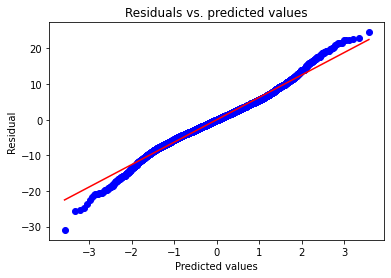

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


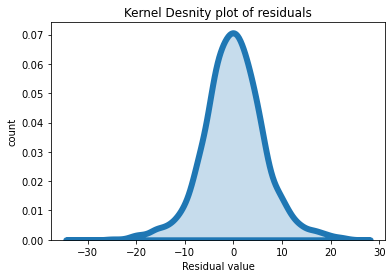

[[ 1.          0.          1.         ...  0.          0.
   0.14981478]
 [ 0.          1.          0.         ...  0.          0.
   0.93386729]
 [ 1.          0.          0.         ...  0.          0.
  -1.24619707]
 ...
 [ 0.          1.          1.         ...  0.          0.
  -0.35852695]
 [ 0.          1.          1.         ...  0.          0.
  -0.21607471]
 [ 1.          0.          0.         ...  0.          0.
  -0.76247237]]
[0 1 0 ... 0 0 1]


In [23]:
def encode_string(cat_feature):
    enc = preprocessing.LabelEncoder()
    enc.fit(cat_feature)
    enc_cat_feature = enc.transform(cat_feature)
    ohe = preprocessing.OneHotEncoder()
    encoded = ohe.fit(enc_cat_feature.reshape(-1,1))
    return encoded.transform(enc_cat_feature.reshape(-1,1)).toarray()

cat_cols = ['Education', 'Occupation', 'Gender', 'NumberCarsOwned', 'NumberChildrenAtHome']
Features = encode_string(AW_data['MaritalStatus'])
for col in cat_cols:
    temp = encode_string(AW_data[col])
    Features = np.concatenate([Features, temp], axis = 1)
    
Features = np.concatenate([Features, np.array(AW_data[['YearlyIncome']])], axis = 1)  
nr.seed(0)
labels = np.array(AW_data['AveMonthSpend'])
indx = range(Features.shape[0])
indx = ms.train_test_split(indx, test_size = 4000)
x_train = Features[indx[0],:]
y_train = np.ravel(labels[indx[0]])
x_test = Features[indx[1],:]
y_test = np.ravel(labels[indx[1]])

scaler = preprocessing.StandardScaler().fit(x_train[:,25:])
x_train[:,25:] = scaler.transform(x_train[:,25:])
x_train[:2]
scaler = preprocessing.StandardScaler().fit(x_test[:,25:])
x_test[:,25:] = scaler.transform(x_test[:,25:])

model = linear_model.LinearRegression(fit_intercept = False)
model.fit(x_train, y_train)

def print_metrics(y_true, y_predicted, n_parameters):
    ## First compute R^2 and the adjusted R^2
    r2 = sklm.r2_score(y_true, y_predicted)
    r2_adj = r2 - (n_parameters - 1)/(y_true.shape[0] - n_parameters) * (1 - r2)
    
   
y_score = model.predict(x_test) 
print_metrics(y_test, y_score, 26)

def resid_qq(y_test, y_score):
    ## first compute vector of residuals. 
    resids = np.subtract(y_test.reshape(-1,1), y_score.reshape(-1,1))
    ## now make the residual plots
    ss.probplot(resids.flatten(), plot = plt)
    plt.title('Residuals vs. predicted values')
    plt.xlabel('Predicted values')
    plt.ylabel('Residual')
    
resid_qq(y_test, y_score)
plt.show()

def kde_resids(y_test, y_score):
     resids = np.subtract(y_test.reshape(-1,1),y_score.reshape(-1,1))
     sns.distplot(resids, hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 6})
     plt.title('Kernel Desnity plot of residuals')
     plt.xlabel('Residual value')
     plt.ylabel('count')
kde_resids(y_test, y_score)
plt.show()

labels = np.array(AW_data['BikeBuyer'])
y_train = np.ravel(labels[indx[0]])
y_test = np.ravel(labels[indx[1]])
print(x_train)
print(y_train)